# Tasks for laboratory assignment 2

In [10]:
# imports section

import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from autocorrect import Speller
import nltk
from wordcloud import WordCloud

import gensim as gs
from gensim.test.utils import lee_corpus_list
from gensim.models import Word2Vec
import gensim.downloader as api

import matplotlib.pyplot as plt

# Download the necessary resources
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /home/lemmy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/lemmy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Extract data from the json file 

Write a script, that would extract all the the data from the json file and return it in a list of texts for further use in the next tasks

In [2]:
import json

def extract_texts_from_file(file_path):
    try:
        # Open and read the JSON file
        with open(file_path, 'r') as file:
            data = json.load(file)
        
        # Return the "texts" field from the JSON data
        return data.get("texts", [])
    
    except (FileNotFoundError, json.JSONDecodeError) as e:
        print(f"Error reading the file: {e}")
        return []

# Example usage
texts = extract_texts_from_file('resources/data.json')
print(texts)


['Oppenheimer, directed by Christopher Nolan, delves into the life of J. Robert Oppenheimer, the theoretical physicist who led the development of the atomic bomb. The film explores his moral and emotional struggles.', "Oppenheimer captures the life of the 'father of the atomic bomb' and his internal conflict after the success of the Manhattan Project. The film's complex narrative reflects on the cost of scientific achievement.", 'In Oppenheimer, Cillian Murphy delivers a riveting performance as the conflicted physicist who grapples with the consequences of his groundbreaking work on the atomic bomb, under the weight of global politics and ethics.', 'Oppenheimer is a cinematic exploration of ambition, guilt, and responsibility. Through stunning visuals and a thought-provoking story, Nolan brings the life of the brilliant but haunted physicist to the big screen.', 'Ducks are versatile waterfowl, known for their adaptability in freshwater and coastal habitats. With webbed feet and waterpr

## Process the texts

Write a script, that would process these texts. Processing should include:

- Lowercasing
- Removing Punctuation
- Removing Special Characters and Numbers
- Stemming or Lemmatization
- Handling Abbreviations
- Spelling Correction

In [ ]:
import pandas as pd
import numpy as np
import string
import spacy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from autocorrect import Speller
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import gensim as gs
from gensim.test.utils import lee_corpus_list
from gensim.models import Word2Vec
import gensim.downloader as api

# Download the necessary resources
nltk.download('stopwords')
nltk.download('wordnet')

# Load spaCy model (had some issues with ntlk.tokenizer)
nlp = spacy.load('en_core_web_sm')

# Initialize Speller for spelling correction
spell = Speller()

# Initialize Lemmatizer and Stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Abbreviations dictionary (example)
abbreviations = {
    "Mr.": "Mister",
    "Dr.": "Doctor",
    "St.": "Saint",
    "Jr.": "Junior"
    # Add more abbreviations as needed
}

def process_texts(texts):
    """
    Process the texts by performing the following:
    - Lowercasing
    - Removing Punctuation
    - Removing Special Characters and Numbers
    - Stemming or Lemmatization
    - Handling Abbreviations
    - Spelling Correction
    
    Args:
        texts (list): List of texts to be processed.
    
    Returns:
        list: The processed texts as a list of strings.
    """
    processed_texts = []
    
    # Get stopwords
    stop_words = set(stopwords.words('english'))

    for text in texts:
        # Step 1: Lowercasing
        text = text.lower()
        
        # Step 2: Handling Abbreviations
        for abbr, full_form in abbreviations.items():
            text = text.replace(abbr, full_form)
        
        # Step 3: Process with spaCy
        doc = nlp(text)
        
        # Step 4: Remove Punctuation, Special Characters, and Numbers
        words = [token.text for token in doc if token.is_alpha]
        
        # Step 5: Spelling Correction
        words = [spell(word) for word in words]
        
        # Step 6: Remove stop words
        words = [word for word in words if word not in stop_words]
        
        # Step 7: Lemmatization (or stemming if preferred)
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

        # Join the words back into a single string
        processed_text = ' '.join(lemmatized_words)
        processed_texts.append(processed_text)
    
    return processed_texts

# Example usage

texts = extract_texts_from_file('resources/data.json')
processed_texts = process_texts(texts)
print(processed_texts)


[nltk_data] Downloading package stopwords to /home/lemmy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/lemmy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['oppenheimer directed christopher nolan elf life robert oppenheimer theoretical physicist led development atomic bomb film explores moral emotional struggle', 'oppenheimer capture life father atomic bomb internal conflict success manhattan project film complex narrative reflects cost scientific achievement', 'oppenheimer million murphy delivers riveting performance conflicted physicist grape consequence groundbreaking work atomic bomb weight global politics ethic', 'oppenheimer cinematic exploration ambition guilt responsibility stunning visuals thought provoking story nolan brings life brilliant haunted physicist big screen', 'duck versatile waterfowl known adaptability freshwater coastal habitat webbed foot waterproof feather excellent swimmer migrating long distance find food warmer climate', 'lamp spider talk yesterday flew nobody noticed except coaster watch blue smell better today door laughing understand whisper secret orange sock', 'duck communicate using range vocalization in

## Visualize as cloud of words

Visualize the texts as a cloud of words.

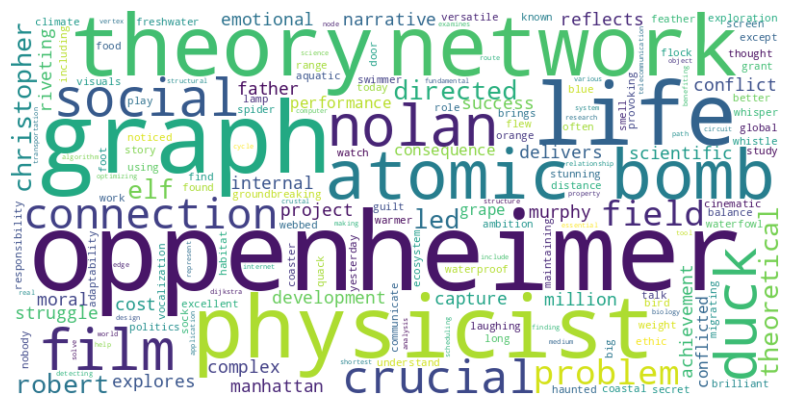

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def visualize_texts(texts_processed):
    """
    Visualize the texts as a cloud of words.

    Args:
        texts_processed (list): List of processed texts (strings).

    Returns:
        None: Displays the word cloud plot.
    """
    # Join all the processed texts into one large text block
    all_text = ' '.join(texts_processed)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    
    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes for a cleaner image
    plt.show()

texts = extract_texts_from_file('resources/data.json')
processed_texts = process_texts(texts)
visualize_texts(processed_texts)


## Calculate cosine similarities using TFIDF

Calculate the TFIDF score and cosine similarity between the texts. You may use gensim, write your own script using numpy or use other module. Output the result as a matrix $n\times n$ of cosine similarity scores (where $n$ is the length of texts list).

**Extra credit**: use word2vec word embeddings in vector spaces to get better TFIDF scores by representing each word as a vector.

In [17]:
# Imports section
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from autocorrect import Speller
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import gensim.downloader as api
import matplotlib.pyplot as plt

# Download the necessary resources
nltk.download('punkt')
nltk.download('wordnet')

# Load pre-trained Word2Vec model from gensim
model = api.load("word2vec-google-news-300")

# Function to calculate cosine similarity using TFIDF
def calculate_tfidf_cosine_similarity(texts):
    """
    Calculate TFIDF cosine similarity between texts and return the similarity matrix.

    Args:
        texts (list): List of processed texts (strings).

    Returns:
        np.ndarray: Cosine similarity matrix (n x n), where n is the number of texts.
    """
    # Initialize the TfidfVectorizer
    vectorizer = TfidfVectorizer()

    # Fit and transform the texts into a TFIDF matrix
    tfidf_matrix = vectorizer.fit_transform(texts)

    # Compute the cosine similarity matrix
    cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

    return cosine_sim_matrix

# Function to convert text into word2vec vector
def get_word2vec_vector(text, model):
    """
    Convert a text into a vector by averaging the word embeddings.
    
    Args:
        text (str): Input text.
        model (gensim.models.keyedvectors.KeyedVectors): Word2Vec model.

    Returns:
        np.ndarray: The averaged vector for the input text.
    """
    words = text.split()
    word_vectors = []

    for word in words:
        if word in model.key_to_index:  # Check if the word is in the model's vocabulary
            word_vectors.append(model[word])

    if word_vectors:
        return np.mean(word_vectors, axis=0)  # Return the mean of word vectors as the text vector
    else:
        return np.zeros(model.vector_size)  # Return a zero vector if no words are found in the model

# Function to calculate cosine similarity using Word2Vec embeddings
def calculate_word2vec_cosine_similarity(texts, model):
    """
    Calculate cosine similarity using Word2Vec embeddings.
    
    Args:
        texts (list): List of processed texts (strings).
        model (gensim.models.keyedvectors.KeyedVectors): Word2Vec model.

    Returns:
        np.ndarray: Cosine similarity matrix (n x n), where n is the number of texts.
    """
    # Convert each text into a Word2Vec vector
    vectors = np.array([get_word2vec_vector(text, model) for text in texts])

    # Calculate cosine similarity between vectors
    cosine_sim_matrix = cosine_similarity(vectors, vectors)

    return cosine_sim_matrix

# Example usage

texts = extract_texts_from_file('resources/data.json')

# Step 1: Calculate cosine similarity using TFIDF
similarity_matrix_tfidf = calculate_tfidf_cosine_similarity(texts)
print("Cosine Similarity Matrix (TFIDF):")
print(similarity_matrix_tfidf)

# Step 2: Calculate cosine similarity using Word2Vec
similarity_matrix_word2vec = calculate_word2vec_cosine_similarity(texts, model)
print("Cosine Similarity Matrix (Word2Vec):")
print(similarity_matrix_word2vec)



[nltk_data] Downloading package punkt to /home/lemmy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/lemmy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[==================================================] 100.0% 1662.8/1662.8MB downloaded
Cosine Similarity Matrix (TFIDF):
[[1.         0.43097756 0.33641724 0.27343667 0.01552764 0.06413209
  0.09123337 0.04319935 0.03829862 0.08130584]
 [0.43097756 1.         0.35647964 0.26223162 0.01399172 0.07912532
  0.13640501 0.05060344 0.04634199 0.12469199]
 [0.33641724 0.35647964 1.         0.18314594 0.05416057 0.05264
  0.10870122 0.04842602 0.08429508 0.08666488]
 [0.27343667 0.26223162 0.18314594 1.         0.05410015 0.12864142
  0.09261143 0.07240644 0.05491692 0.07691907]
 [0.01552764 0.01399172 0.05416057 0.05410015 1.         0.06297553
  0.13676751 0.04157358 0.09174769 0.02555095]
 [0.06413209 0.07912532 0.05264    0.12864142 0.06297553 1.
  0.05851478 0.06106399 0.03267813 0.05480177]
 [0.09123337 0.13640501 0.10870122 0.09261143 0.13676751 0.05851478
  1.         0.08086939 0.11211794 0.08504209]
 [0.04319935 0.05060344 0.04842602 0.07240644 0.04157358 0.06106399
  0.08086939 1.  

## Visualize data

Visualize the `cosine_matrix` data using matplotlib. Choose your own method of plotting the scores in a way, that the similarity indeces between texts would be instantly visible. Plot data about texts as well (a couple of first words in the document).

*Hint: remember heat maps, aren't they nice for this task?*

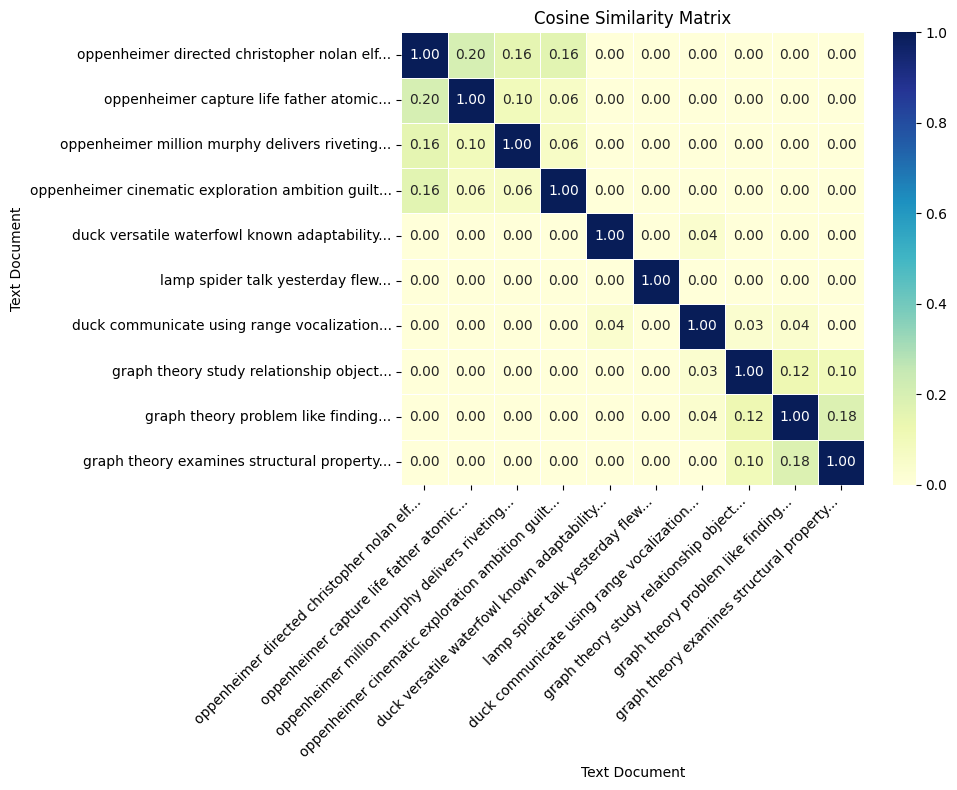

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_data(cosine_matrix, texts_processed):
    # Prepare the labels for the heatmap (first 5 words of each document for better visibility)
    text_labels = [' '.join(text.split()[:5]) + '...' for text in texts_processed]
    
    # Create a heatmap using seaborn
    plt.figure(figsize=(10, 8))  # Set the figure size
    sns.heatmap(cosine_matrix, annot=True, cmap="YlGnBu", xticklabels=text_labels, yticklabels=text_labels, fmt=".2f", linewidths=0.5)
    
    # Set labels and title
    plt.title("Cosine Similarity Matrix")
    plt.xlabel("Text Document")
    plt.ylabel("Text Document")
    
    # Show the plot
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.yticks(rotation=0)  # Keep y-axis labels horizontal
    plt.tight_layout()  # Ensure everything fits in the plot
    plt.show()

# Example usage with a sample cosine_matrix and texts_processed

texts = extract_texts_from_file('resources/data.json')
texts_processed = process_texts(texts)
cosine_matrix = calculate_tfidf_cosine_similarity(texts_processed)
visualize_data(cosine_matrix, texts_processed)


## Analyse your own text using TFIDF (or any other method)

Analyse your own text using previous methods. You may use API fetching to get text data, download texts from Kaggle or use any texts you want. Find cosine similarities and visualize them.

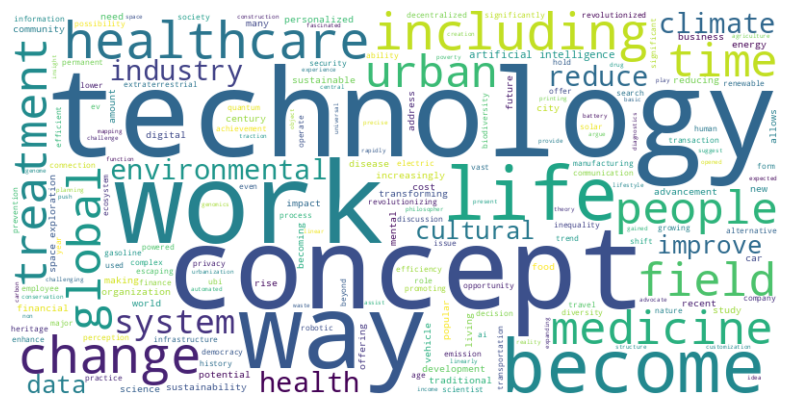

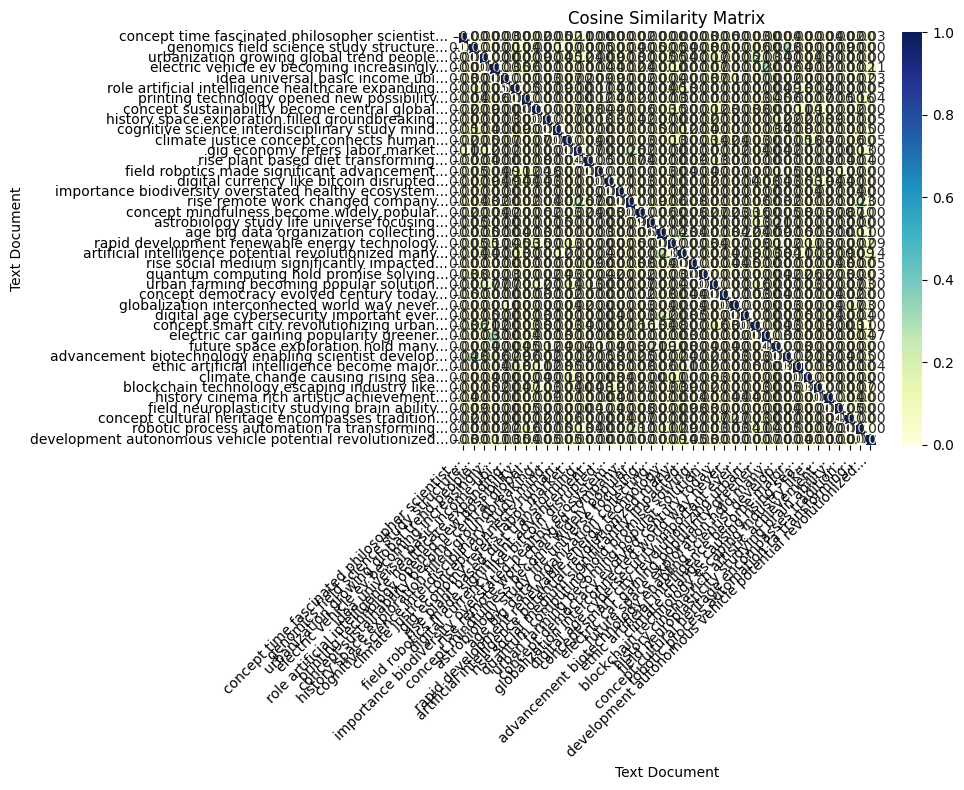

In [24]:


texts = extract_texts_from_file('/home/lemmy/lab2v2/assignment-2-text-processing-and-nlp-lemmrz/resources/new_data.json')

texts_processed = process_texts(texts)
visualize_texts(texts_processed)

cosine_matrix = calculate_tfidf_cosine_similarity(texts_processed)
visualize_data(cosine_matrix, texts_processed)
